In [76]:
import os
import sys

# TO access AIMA repo
if sys.platform == "win32":
    module_path = os.path.abspath(os.path.join('..\..'))
    ExtraFolderPath = os.path.abspath(os.path.join('..\EXTRA_DIR'))
else:
    module_path = os.path.abspath(os.path.join('../..'))
    ExtraFolderPath = os.path.abspath(os.path.join('../EXTRA_DIR'))
    
if module_path not in sys.path:
    sys.path.append(module_path)
    sys.path.append(ExtraFolderPath)
sys.path.insert(1, module_path) 
sys.path.insert(2, ExtraFolderPath) 

# 1.1 BUILDING YOUR WORLD

# Environment details

<img src="https://studyeasy.org/wp-content/uploads/2019/10/xSlide1-1.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/xSlide.jpg">

#  Environment Rules :

# 1. Prince will search princess 




# 2. Prince should not encounter the guard

# 3. Noise will be present in neighboring locations 


# 4. Guard and princess cannot be in the same place

In [77]:
from agents import *
from notebook import psource

from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

# **Simple Reflex agent**


In [78]:
class Castle(GraphicEnvironment):
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        loc = copy.deepcopy(agent.location) # find out the target location
        #Check if agent is about to bump into a wall
        if agent.direction.direction == Direction.R:
            loc[0] += 1
        elif agent.direction.direction == Direction.L:
            loc[0] -= 1
        elif agent.direction.direction == Direction.D:
            loc[1] += 1
        elif agent.direction.direction == Direction.U:
            loc[1] -= 1
        if not self.is_inbounds(loc):
            things.append(Bump())
        return things
    def execute_action(self, agent, action):
        if action == 'moveforward':
            print('{} decided to {} at location: {}'.format(str(agent)[1:-1], action, agent.location))
            agent.moveforward()
        if action == "bump":
            print("Turn to avoid bump")
            agent.avoid_bump()
        if action == "princess":
            items = self.list_things_at(agent.location, tclass=Princess)
            if len(items) != 0:
                if agent.princess(items[0]):
                    print('{} met {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0])  
                    agent.alive = False
                    
                    
        if action == 'guard':
            agent.alive = False
            print("Price is fighting with the guard, OOh no. Price wil get killed!!")
            
    def is_done(self):
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        if(dead_agents):
            print("Game Over.")
        return dead_agents


    

In [79]:
def program(percepts):
    '''Returns an action based on it's percepts'''
    for percept in percepts:
        if isinstance(percept,Bump):    
            return 'bump'
        if isinstance(percept,Princess):    
            return 'princess'
        if isinstance(percept,Guard):    
            return 'guard'
    return "moveforward"


In [80]:
class Bump(Thing):
    pass

class Princess(Thing):
    pass

# Noise will be there if neighbour has guard 
class Noise(Thing):
    pass

# If agent visit Guard, Guard will kill the agent
class Guard(Thing):
    pass

class ThePrince(Agent):
    location = [0,0]
    direction = Direction("right")
    
    def princess(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Princess):
            return True
        return False
    
    def moveforward(self):
        if self.direction.direction == Direction.R:
            self.location[0] += 1
        elif self.direction.direction == Direction.L:
            self.location[0] -= 1
        elif self.direction.direction == Direction.D:
            self.location[1] += 1
        elif self.direction.direction == Direction.U:
            self.location[1] -= 1
        return False
    def avoid_bump(self):
        if self.direction.direction=='right':
            self.location[1] += 1
            print("left turn")
            self.direction.direction ='left'
        elif self.direction.direction=='left':
            self.location[1] += 1
            print("right turn")
            self.direction.direction ='right'
        
        

# Run configuration details: 

# 1. Agent will start from 0,0

# 2. Gurad and princess will be in random locations

# 3. Gurad and princess will not share location

# 4. Environment size: 7x7

# 5. Game is complete: 1. Prince met princess. 2. Prince is killed 

# **Test runs data**

<img src="https://studyeasy.org/wp-content/uploads/2019/10/agent1_testcases.jpg" alt="data1" border="0">

# 4. Environment size changed: 7x7

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide8.jpg">

In [81]:
environment_X = 10
environment_Y = 10

In [82]:


castle = Castle(environment_X, environment_Y, color={'ThePrince': (0,100,100), 'Princess': (0,0,200), 'Guard': (200,0,0), 'Noise':(100,50,50)})
prince = ThePrince(program)
princess = Princess()

#Random selection of guard position
guard_x = random.randint(0,environment_X - 1)
guard_y = random.randint(0,environment_Y - 1)

princess_x = random.randint(0,environment_X - 1)
princess_y = random.randint(0,environment_Y - 1)

if guard_x == princess_x and guard_y == princess_y:
    princess_x -+ 1
    princess_y -+ 1


noise1 = Noise()
noise2 = Noise()
noise3 = Noise()
noise4 = Noise()
noise5 = Noise()
noise6 = Noise()
noise7 = Noise()
noise8 = Noise()

guard = Guard()
castle.add_thing(prince, [0,0])
castle.add_thing(princess, [princess_x, princess_y])
castle.add_thing(noise1, [guard_x - 1,guard_y - 1])
castle.add_thing(noise2, [guard_x - 1,guard_y])
castle.add_thing(noise3, [guard_x - 1,guard_y + 1])
castle.add_thing(noise4, [guard_x,guard_y - 1])
castle.add_thing(noise5, [guard_x,guard_y + 1])
castle.add_thing(noise6, [guard_x + 1,guard_y - 1])
castle.add_thing(noise7, [guard_x + 1,guard_y])
castle.add_thing(noise8, [guard_x + 1,guard_y + 1])

castle.add_thing(guard, [guard_x,guard_y])

print("GO GO prince")
castle.run(100)

GO GO prince


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


ThePrince decided to moveforward at location: [0, 0]


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


ThePrince met Princess at location: [1, 0]


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Game Over.


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


# When the agent fails?

As agent doesn't have movement history and doesn't know how the world works. It follows sequential path! 
Agent fails when it guard is in between his way to princess.

# Model-based reflex agent

<img src="https://static.javatpoint.com/tutorial/ai/images/model-based-reflex-agent.png">

A model-based agent has two important factors:

    Model: It is knowledge about "how things happen in the world," so it is called a Model-based agent.
    
    Internal State: It is a representation of the current state based on percept history.

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide9.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide10.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide11.jpg">

# When does prince fail, as model based agent?

1. If princess and guard are at same location
2. Agent fails to detect the guard location

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide12.jpg">

In [83]:
class Castle(GraphicEnvironment):
    send_height_weight_info = False
    sent_noise_first = False
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        return things
    def execute_action(self, agent, action):
        # Provice height and weiht info to agent program
        if not self.send_height_weight_info:
            agent.set_height_wight(self.width,self.height)
            self.send_height_weight_info = True
                
        if action == 'move':
            print('{} decided to move at location: {}'.format(str(agent)[1:-1],agent.location))
            agent.move()

        if action == "princess":
            items = self.list_things_at(agent.location, tclass=Princess)
            if len(items) != 0:
                if agent.princess(items[0]):
                    print('{} met {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0])  
                    # Used to end the game
                    agent.alive = False
                    
        if action == "noise":
            items = self.list_things_at(agent.location, tclass=Noise)
            if len(items) != 0:
                if agent.noise(items[0]):
                    print('{} heard {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    print("Noise disappers when agent hears it, He he")
                    if not self.sent_noise_first:
                        self.sent_noise_first = True
                        agent.identify_guard_location_and_update_path(agent.location)
                    self.delete_thing(items[0])  
        if action == 'guard':
            agent.alive = False
            print("Price is fighting with the guard")
            
    def is_done(self):
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        if(dead_agents):
            print("Game Over.")
        return dead_agents


In [84]:
def program(percepts):
    '''Returns an action based on it's percepts'''
    for percept in percepts:
        if isinstance(percept,Princess):    
            return 'princess'
        if isinstance(percept,Guard):    
            return 'guard'
        if isinstance(percept,Noise): 
            return 'noise'
    return "move"

In [85]:
class Bump(Thing):
    pass

class Princess(Thing):
    pass

# Noise will be there if neighbour has guard 
class Noise(Thing):
    pass

# If agent visit Guard, Guard will kill the agent
class Guard(Thing):
    pass

class ThePrince(Agent):
    location = [0,0]
    visited_locations = [] 
    found_noise = False
    rows = -1
    cols = -1
    current_location = 0
    path = []
    gaurd_location = []
    
    def identify_guard_location_and_update_path(self,noise_location):
        print("Noise identified")
        [path_row,path_col] = self.path[self.current_location]
        # Condition checks the direction, if is Right direction, else is left
        if(path_row % 2 == 0):
            [x,y] = noise_location
            self.gaurd_location = [x+1,y+1]
            index = self.path.index(self.gaurd_location)
            #update path sequence to skip the guard
            #As gurad will be in the next row, the skip sequence will be up->left->left->down
            print(self.gaurd_location)
            #noise location comes in reversed order
            [i,j] = self.gaurd_location
            self.path.insert(index,[i,j-1])
            self.path.insert(index,[i-1,j-1])
            self.path.insert(index,[i-1,j])
            self.path.insert(index,[i-1,j+1])
            self.path.insert(index,[i,j+1])
            self.path.remove(self.gaurd_location)
        else:
            #noise location comes in reversed order
            [y,x] = noise_location
            self.gaurd_location = [x+1,y-1]
            print("Guard location")
            index = self.path.index(self.gaurd_location)
            #update path sequence to skip the guard
            #As gurad will be in the next row, the skip sequence will be up->right->right->down
            [i,j] = self.gaurd_location
            self.path.insert(index,[i,j+1])
            self.path.insert(index,[i-1,j+1])
            self.path.insert(index,[i-1,j])
            self.path.insert(index,[i-1,j-1])
            self.path.remove(self.gaurd_location)
        
            
        
    def set_height_wight(self, height, width):
        self.rows = width
        self.cols = height
        
    def princess(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Princess):
            return True
        return False
    
    def noise(self, thing):
         if isinstance(thing, Noise):
            return True
         return False
        
    #The function will receive only Noise try of itmes
    def move(self):
        if len(self.path)==0:
            for i in range(self.rows):
                if(i%2 == 0):
                    start = 0
                    stop = self.cols
                    step = 1
                else:
                    #Start is inclusive and stop is exclsive
                    start = self.cols - 1
                    stop = 0 -1
                    step = -1
                for j in range(start,stop,step):
                    self.path.append([i,j])       
        self.visited_locations.append(self.location)
        
        #Block handles row wise setp movmentment
        [x,y] = self.path[self.current_location]
        self.location[1] = x
        self.location[0] = y
        self.current_location +=1
        #Block handles 1 setp movmentment ends
        return False

In [86]:
environment_X = 8
environment_Y = 10

In [87]:
castle = Castle(environment_X, environment_Y, color={'ThePrince': (0,100,100), 'Princess': (0,0,200), 'Guard': (200,0,0), 'Noise':(100,50,50)})
prince = ThePrince(program)
princess = Princess()

#Random selection of guard position
guard_x = random.randint(0,environment_X - 1)
guard_y = random.randint(0,environment_Y - 1)
princess_x = random.randint(0,environment_X - 1)
princess_y = random.randint(0,environment_Y - 1)

noise1 = Noise()
noise2 = Noise()
noise3 = Noise()
noise4 = Noise()
noise5 = Noise()
noise6 = Noise()
noise7 = Noise()
noise8 = Noise()

guard = Guard()
castle.add_thing(prince, [0,0])
castle.add_thing(princess, [princess_x, princess_y])

castle.add_thing(noise1, [guard_x - 1,guard_y - 1])
castle.add_thing(noise2, [guard_x - 1,guard_y])
castle.add_thing(noise3, [guard_x - 1,guard_y + 1])
castle.add_thing(noise4, [guard_x,guard_y - 1])
castle.add_thing(noise5, [guard_x,guard_y + 1])
castle.add_thing(noise6, [guard_x + 1,guard_y - 1])
castle.add_thing(noise7, [guard_x + 1,guard_y])
castle.add_thing(noise8, [guard_x + 1,guard_y + 1])

castle.add_thing(guard, [guard_x,guard_y])



print("GO GO prince")
castle.run(100)

GO GO prince


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [0, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [0, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [1, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [2, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [3, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [4, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [5, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [6, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [7, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [7, 1]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [6, 1]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [5, 1]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [4, 1]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [3, 1]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [2, 1]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [1, 1]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [0, 1]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [0, 2]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [1, 2]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [2, 2]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [3, 2]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [4, 2]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [5, 2]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [6, 2]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince met Princess at location: [7, 2]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


Game Over.


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


# Test Runs

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide13.jpg">

# Goal-based agents

<img src="https://static.javatpoint.com/tutorial/ai/images/goal-based-agent.png">

The knowledge of the current state environment is not always sufficient to decide for an agent to what to do.<br/>
The agent needs to know its goal which describes desirable situations.<br/>
Goal-based agents expand the capabilities of the model-based agent by having the "goal" information.<br/>
They choose an action, so that they can achieve the goal.<br/>
These agents may have to consider a long sequence of possible actions before deciding whether the goal is achieved or not. <br/>Such considerations of different scenario are called searching and planning, which makes an agent proactive.<br/>

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide17.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide18.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide20.jpg">

In [88]:
environment_X = 8
environment_Y = 10

goal_x = 6
goal_y = 6

In [89]:
class Castle(GraphicEnvironment):
    send_height_weight_info = False
    sent_noise_first = False
    def percept(self, agent):
        '''return a list of things that are in our agent's location'''
        things = self.list_things_at(agent.location)
        return things
    def execute_action(self, agent, action):
        # Provice height and weiht info to agent program
        if not self.send_height_weight_info:
            agent.set_height_wight(goal_x,goal_y)
            self.send_height_weight_info = True
                
        if action == 'move':
            print('{} decided to move at location: {}'.format(str(agent)[1:-1],agent.location))
            agent.move()

        if action == "princess":
            items = self.list_things_at(agent.location, tclass=Princess)
            if len(items) != 0:
                if agent.princess(items[0]):
                    print('{} met {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    self.delete_thing(items[0])  
                    # Used to end the game
                    agent.alive = False
                    
        if action == "noise":
            items = self.list_things_at(agent.location, tclass=Noise)
            if len(items) != 0:
                if agent.noise(items[0]):
                    print('{} heard {} at location: {}'
                          .format(str(agent)[1:-1], str(items[0])[1:-1], agent.location))
                    print("Noise disappers when agent hears it, He he")
                    if not self.sent_noise_first:
                        self.sent_noise_first = True
                        agent.identify_guard_location_and_update_path(agent.location)
                    self.delete_thing(items[0])  
        if action == 'guard':
            agent.alive = False
            print("Price is fighting with the guard")
            
    def is_done(self):
        dead_agents = not any(agent.is_alive() for agent in self.agents)
        if(dead_agents):
            print("Game Over.")
        return dead_agents

In [90]:
def program(percepts):
    '''Returns an action based on it's percepts'''
    for percept in percepts:
        if isinstance(percept,Princess):    
            return 'princess'
        if isinstance(percept,Guard):    
            return 'guard'
        if isinstance(percept,Noise): 
            return 'noise'
    return "move"

In [91]:
class Bump(Thing):
    pass

class Princess(Thing):
    pass

# Noise will be there if neighbour has guard 
class Noise(Thing):
    pass

# If agent visit Guard, Guard will kill the agent
class Guard(Thing):
    pass

class ThePrince(Agent):
    location = [0,0]
    visited_locations = [] 
    found_noise = False
    rows = -1
    cols = -1
    current_location = 0
    path = []
    gaurd_location = []
    
    def identify_guard_location_and_update_path(self,noise_location):
        found_once = False
        if(found_once == False):
            print("Noise identified")
            [path_row,path_col] = self.path[self.current_location]
            [x,y] = noise_location   
            self.path.remove(self.path[self.current_location])
            self.path.remove(self.path[self.current_location])
            self.path.insert(self.current_location,[path_row+3,path_col+3])
            self.path.insert(self.current_location,[path_row+3,path_col+2])
            self.path.insert(self.current_location,[path_row+3,path_col+1])
            self.path.insert(self.current_location,[path_row+3,path_col])
            self.path.insert(self.current_location,[path_row+2,path_col])
            self.path.insert(self.current_location,[path_row+1,path_col])
            found_once = True
        
    def set_height_wight(self, height, width):
        self.rows = width
        self.cols = height
        
    def princess(self, thing):
        '''returns True upon success or False otherwise'''
        if isinstance(thing, Princess):
            return True
        return False
    
    def noise(self, thing):
         if isinstance(thing, Noise):
            return True
         return False
        
    #The function will receive only Noise try of itmes
    def move(self):
        current_location=[0,0]
        
        new_location=[0,0]
        goal_location=[4,3]
        x2=4
        y2=3
        if len(self.path)==0:
            i=0
            j=0
            x=goal_x
            y=goal_y
            while i<x  or j<y:
                tmp = [0,0]
                if i<x:
                    i +=1
                if j<y:
                    j += 1
                tmp = [j,i]
                self.path.append(tmp)
        self.visited_locations.append(self.location)
        
        #Block handles row wise setp movmentment
        [x,y] = self.path[self.current_location]
        self.location[1] = x
        self.location[0] = y
        self.current_location +=1
        #Block handles 1 setp movmentment ends
        return False
      

In [92]:
castle = Castle(environment_X, environment_Y, color={'ThePrince': (0,100,100), 'Princess': (0,0,200), 'Guard': (200,0,0), 'Noise':(100,50,50)})
prince = ThePrince(program)
princess = Princess()

#Random selection of guard position
guard_x = random.randint(0,environment_X - 1)
guard_y = random.randint(0,environment_Y - 1)

guard_x = 3
guard_y = 3

princess_x = goal_x
princess_y = goal_y

noise1 = Noise()
noise2 = Noise()
noise3 = Noise()
noise4 = Noise()
noise5 = Noise()
noise6 = Noise()
noise7 = Noise()
noise8 = Noise()

guard = Guard()
castle.add_thing(prince, [0,0])
castle.add_thing(princess, [princess_x, princess_y])

castle.add_thing(noise1, [guard_x - 1,guard_y - 1])
castle.add_thing(noise2, [guard_x - 1,guard_y])
castle.add_thing(noise3, [guard_x - 1,guard_y + 1])
castle.add_thing(noise4, [guard_x,guard_y - 1])
castle.add_thing(noise5, [guard_x,guard_y + 1])
castle.add_thing(noise6, [guard_x + 1,guard_y - 1])
castle.add_thing(noise7, [guard_x + 1,guard_y])
castle.add_thing(noise8, [guard_x + 1,guard_y + 1])

castle.add_thing(guard, [guard_x,guard_y])



print("GO GO prince")
castle.run(100)

GO GO prince


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [0, 0]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [1, 1]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince heard Noise at location: [2, 2]
Noise disappers when agent hears it, He he
Noise identified


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [2, 2]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince heard Noise at location: [3, 4]
Noise disappers when agent hears it, He he


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [3, 4]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [3, 5]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [3, 6]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [4, 6]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince decided to move at location: [5, 6]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


ThePrince met Princess at location: [6, 6]


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


Game Over.


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


# Testcases

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide24.jpg">

# PEAS description

<p/><H4>Performance: Meet the princess, avoid the guard  
<p/><H4>Environment: Princess, Noise, guard
<p/><H4>Actuators: walk
<p/><H4>Sensors:Hear

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide22.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide23.jpg">

# Observations

<p> Goal based agent performace better than simple agent and model. Best performs if not percepts in path

# 1.2 SEARCHING YOUR WORLD

# ** Searching the world custom supporter methods  **

In [93]:
# block_path_generator method will generation blocks walls to demonstrate the search algos

def block_path_generator(env_X, env_y):
    X = env_X
    Y = env_y
    blocked_paths = []
    open_paths = []
    for i in range(0,X):
        for j in range(0,Y):
            if  (i+j) % 2 == 0:
                blocked_paths.append((i,j))
            else:
                open_paths.append((i,j))
            j+=1
        i+=1
    return [blocked_paths, open_paths]

In [94]:
# Provides neighbor locations
#size_x: max x value, size_y: max y value, location_x: x codinate for current location, location_y: y cordinate for current location
def neighbors(size_x, size_y, location_x, location_y):
    X = size_x
    Y = size_y
    neighbors_2d = lambda x, y : [(x2, y2) for x2 in range(x-1, x+2)
                               for y2 in range(y-1, y+2)
                               if (-1 < x <= X and
                                   -1 < y <= Y and
                                   (x != x2 or y != y2) and
                                   (0 <= x2 <= X) and
                                   (0 <= y2 <= Y))]
    return neighbors_2d(location_x, location_y)
# Credit: https://stackoverflow.com/questions/22550302/find-neighbors-in-a-matrix


In [95]:
#my_dictionary class will help in dictionary generation
#Credit: https://www.geeksforgeeks.org/python-add-new-keys-to-a-dictionary/
class my_dictionary(dict): 
  
    # __init__ function 
    def __init__(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value 

In [96]:
# Generate dictionaries for GraphProblem
def generate_open_paths_dict(open_paths,env_x, env_y):
    environment_X = env_x
    environment_Y = env_y
    castle_dict  = my_dictionary() 
    for path in open_paths:
        (x,y) = path
        neighbors_list = neighbors(environment_X, environment_Y, x,y)
        tmp = my_dictionary()
        for neighbor_element in neighbors_list:
            if neighbor_element in open_paths:
                (j,k) = neighbor_element
                tmp_key = str(j)+"_"+str(k)
                tmp.add(tmp_key,x+y+j+k)
        castle_key = str(x)+"_"+str(y)
        castle_dict.add(castle_key, tmp)
    return castle_dict



In [97]:
# Generate names to locations in GraphProblem
def generate_open_path_locations(open_paths):
    path_locations = my_dictionary()
    for path_element in open_paths:
        (x,y) = path_element
        path_locations.add(str(x)+"_"+str(y),(x,y))
    return path_locations


# **1.2 SEARCHING YOUR WORLD**

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide1.jpg">

In [98]:

environment_X = 10
environment_Y = 10
[blocked_paths,open_paths] = block_path_generator(environment_X,environment_Y)
castle = Castle(environment_X, environment_Y, color={'ThePrince': (0,100,100), 'Princess': (0,0,200), 'Guard': (200,0,0), 'Noise':(100,50,50)})
for i in range(0,len(blocked_paths)):
    name = "noise_"+str(i)
    name = Noise()
    (a,b) = blocked_paths[i]
    castle.add_thing(name,[a,b])



print("blocks")
castle.run(0)

blocks


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide2.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide4.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide5.jpg">

In [99]:
# Taken from search.ipynb notebook
def tree_breadth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the queue
    frontier = deque([Node(problem.initial)])
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of queue
        node = frontier.popleft()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def breadth_first_tree_search(problem):
    "Search the shallowest nodes in the search tree first."
    iterations, all_node_colors, node = tree_breadth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [100]:
castle_graph = generate_open_paths_dict(open_paths, environment_X,environment_Y)
castle_location = generate_open_path_locations(open_paths)


castle_map = UndirectedGraph(castle_graph)
castle_map.locations = castle_location


# node colors, node positions and node label positions
node_colors = {node: 'white' for node in castle_map.locations.keys()}
node_positions = castle_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in castle_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in castle_map.graph_dict.items() for k2, v2 in v.items()}

castle_graph_data = {  'graph_dict' : castle_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

#show_map(castle_graph_data)

all_node_colors = []
castle_problem = GraphProblem('0_1', '4_3', castle_map)
a, b, c = breadth_first_tree_search(castle_problem)
# display_visual(castle_graph_data, user_input=False, 
#                algorithm=breadth_first_tree_search, 
#                problem=castle_problem)



<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide6.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide7.jpg">

# Uninformed search: 1. Depth First Graph Search

In [101]:
environment_X = 10
environment_Y = 10

In [102]:
def graph_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    If two paths reach a state, only use the first one. [Figure 3.7]"""
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    hops = []
    frontier = [(Node(problem.initial))]
    explored = set()
    
    # modify the color of frontier nodes to orange
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of stack
        node = frontier.pop()
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        hops.append(node.path)
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            hops.append(node.path)
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            hops.append(node.path)
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        hops.append(node.path)
        all_node_colors.append(dict(node_colors))
        
    return None


def depth_first_graph_search(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node= graph_search_for_vis(problem)
    return(iterations, all_node_colors, node)

# Configurations

Source location : (1,0) | Goal location: (8,3)

In [103]:
environment_X = 10
environment_Y = 10

In [104]:
[blocked_paths, open_paths] = block_path_generator(environment_X,environment_Y)
castle_graph = generate_open_paths_dict(open_paths, environment_X,environment_Y)
castle_location = generate_open_path_locations(open_paths)
castle_map = UndirectedGraph(castle_graph)
castle_map.locations = castle_location


# node colors, node positions and node label positions
node_colors = {node: 'white' for node in castle_map.locations.keys()}
node_positions = castle_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in castle_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in castle_map.graph_dict.items() for k2, v2 in v.items()}

castle_graph_data = {  'graph_dict' : castle_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

#show_map(castle_graph_data)

all_node_colors = []
castle_problem = GraphProblem('1_0', '8_3', castle_map)
a, b, c = depth_first_graph_search(castle_problem)

print("Number of iteration for finding solution: ", a)
display_visual(castle_graph_data, user_input=False, 
               algorithm=depth_first_graph_search, 
               problem=castle_problem)

Number of iteration for finding solution:  472


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

<img src="https://studyeasy.org/wp-content/uploads/2019/10/s1.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/s1_1.jpg">

#  Uninformed search: 2. BREADTH-FIRST GRAPH SEARCH

In [105]:
environment_X = 10
environment_Y = 10

In [106]:
def breadth_first_search_graph(problem):
    "[Figure 3.11]"
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = deque([node])
    
    # modify the color of frontier nodes to blue
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
        
    explored = set()
    while frontier:
        node = frontier.popleft()
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        explored.add(node.state)     
        
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    node_colors[child.state] = "green"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))
                    return(iterations, all_node_colors, child)
                frontier.append(child)

                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
                    
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

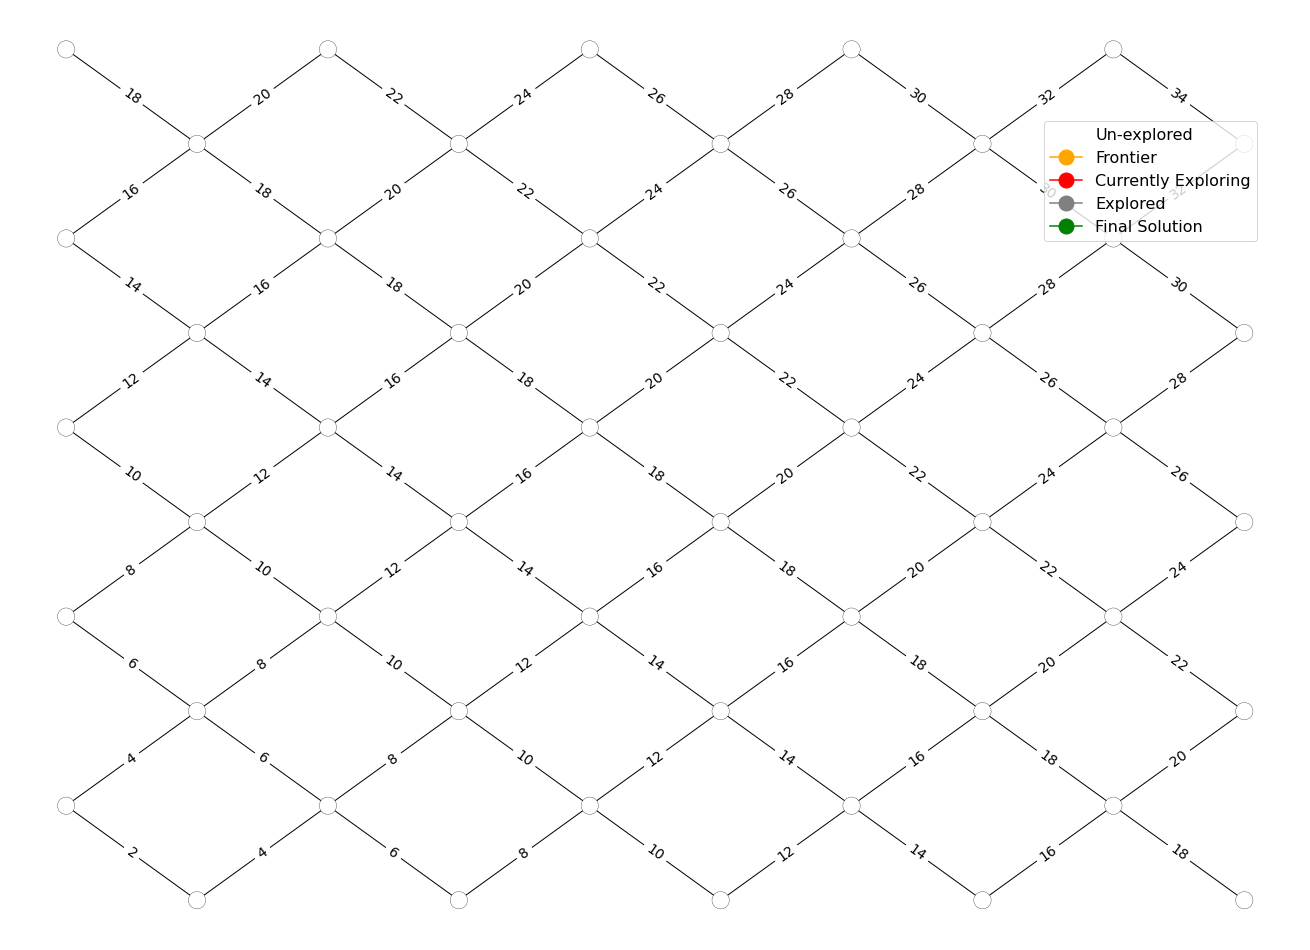

Number of iteration for finding solution:  86


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

In [107]:
[blocked_paths, open_paths] = block_path_generator(environment_X,environment_Y)
castle_graph = generate_open_paths_dict(open_paths, environment_X,environment_Y)
castle_location = generate_open_path_locations(open_paths)
castle_map = UndirectedGraph(castle_graph)
castle_map.locations = castle_location


# node colors, node positions and node label positions
node_colors = {node: 'white' for node in castle_map.locations.keys()}
node_positions = castle_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in castle_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in castle_map.graph_dict.items() for k2, v2 in v.items()}

castle_graph_data = {  'graph_dict' : castle_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

show_map(castle_graph_data)

all_node_colors = []



all_node_colors = []
castle_problem = GraphProblem('1_0', '8_3', castle_map)
(a,b,c) = breadth_first_search_graph(castle_problem)
print("Number of iteration for finding solution: ", a)
display_visual(castle_graph_data, user_input=False, 
               algorithm=breadth_first_search_graph, 
               problem=castle_problem)

<img src="https://studyeasy.org/wp-content/uploads/2019/10/s2_1.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/s2.jpg">

#  Uninformed search: 3. ITERATIVE DEEPENING SEARCH

In [108]:
environment_X = 10
environment_Y = 10

In [109]:
def depth_limited_search_graph(problem, limit = -1):
    '''
    Perform depth first search of graph g.
    if limit >= 0, that is the maximum depth of the search.
    '''
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    frontier = [Node(problem.initial)]
    explored = set()
    
    cutoff_occurred = False
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
      
    while frontier:
        # Popping first node of queue
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)

        elif limit >= 0:
            cutoff_occurred = True
            limit += 1
            all_node_color.pop()
            iterations -= 1
            node_colors[node.state] = "gray"

        
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in frontier:
            limit -= 1
            # modify the color of frontier nodes to orange
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return 'cutoff' if cutoff_occurred else None


def depth_limited_search_for_vis(problem):
    """Search the deepest nodes in the search tree first."""
    iterations, all_node_colors, node = depth_limited_search_graph(problem)
    return(iterations, all_node_colors, node)

In [110]:
def iterative_deepening_search_for_vis(problem):
    for depth in range(sys.maxsize):
        iterations, all_node_colors, node=depth_limited_search_for_vis(problem)
        if iterations:
            return (iterations, all_node_colors, node)

In [111]:
[blocked_paths, open_paths] = block_path_generator(environment_X,environment_Y)
castle_graph = generate_open_paths_dict(open_paths, environment_X,environment_Y)
castle_location = generate_open_path_locations(open_paths)
castle_map = UndirectedGraph(castle_graph)
castle_map.locations = castle_location


# node colors, node positions and node label positions
node_colors = {node: 'white' for node in castle_map.locations.keys()}
node_positions = castle_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in castle_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in castle_map.graph_dict.items() for k2, v2 in v.items()}

castle_graph_data = {  'graph_dict' : castle_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

#show_map(castle_graph_data)

all_node_colors = []



all_node_colors = []
castle_problem = GraphProblem('1_0', '8_3', castle_map)
(a,b,c) = iterative_deepening_search_for_vis(castle_problem)
print("Number of iteration for finding solution: ", a)
display_visual(castle_graph_data, user_input=False, 
               algorithm=iterative_deepening_search_for_vis, 
               problem=castle_problem)


Number of iteration for finding solution:  472


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

<img src="https://studyeasy.org/wp-content/uploads/2019/10/s3-1.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/s3_1.jpg">

# Test cases - configuration

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide15.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/Slide16.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/search_1_TS.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/x1.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/x2.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/x3.jpg">

# Forward chaining and Backward chaining

<img src="https://studyeasy.org/wp-content/uploads/2019/10/FC.jpg">

<img src="https://studyeasy.org/wp-content/uploads/2019/10/BC.jpg">

#Thanks! Have a nice day :)